In [1]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [2]:
pip install tensorflow


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np


### Problem Position

In this lab, we will try to classify articles of clothing from the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. A few samples are shown below:  

<center><img src="https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true" width="400"  /></center>


Fashion-MNIST is a dataset of article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [4]:
#load data
fashion_mnist=tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**Labels**  
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [6]:
targets_names=["T-Shirt", "Trousers", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot" ]

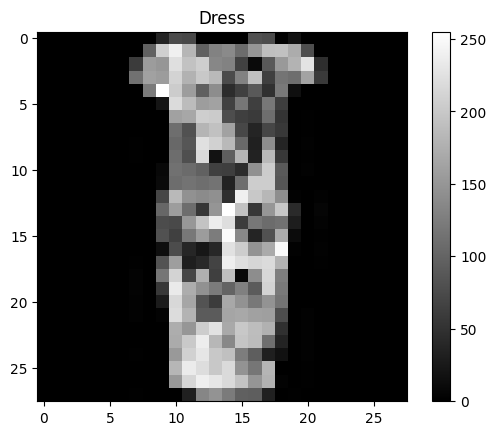

In [7]:
plt.figure()
plt.imshow(X_test[100], cmap='gray')
plt.colorbar()
plt.title(targets_names[y_test[100]])
plt.show()

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:  
**Training data — used for training the model  
Validation data — used for tuning the hyperparameters and evaluate the models  
Test data — used to test the model after the model has gone through initial vetting by the validation set.**  

In [8]:
    X_val = X_test[:8000]
    y_val = y_test[:8000]
    X_test = X_test[8000:]
    y_test = y_test[8000:]

In [9]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(60000, 28, 28)
(2000, 28, 28)
(8000, 28, 28)


### Build the Model

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


**The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). This layer has no parameters to learn; it only reformats the data.**  

**After the pixels are flattened, the network consists of a sequence of 03 tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers:  
The first Dense layer has 256 nodes (or neurons)  
The second 128 neurons  
The 3rd 64 neurons  
The last 10 neurons returns an array with length of 10.  
Each node contains a score that indicates the current image belongs to one of the 10 classes.**    

In [11]:
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile The Model

In [12]:
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=["accuracy"])

### Train the Model

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
#validation_data : train the model on your training data and tune your hyperparameters with the results of metrics (accuracy, loss etc) that you get from your validation set.
# that's why it is important to split data into test, validation(dev) and test sets

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 1.2291 - accuracy: 0.7628 - val_loss: 0.5366 - val_accuracy: 0.8077
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4893 - accuracy: 0.8256 - val_loss: 0.5090 - val_accuracy: 0.8185
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4334 - accuracy: 0.8432 - val_loss: 0.4294 - val_accuracy: 0.8480
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4054 - accuracy: 0.8556 - val_loss: 0.4135 - val_accuracy: 0.8551
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3869 - accuracy: 0.8623 - val_loss: 0.4100 - val_accuracy: 0.8558
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3710 - accuracy: 0.8682 - val_loss: 0.4530 - val_accuracy: 0.8414
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3600 - accuracy: 0.8721 - val_loss: 0.3934 - val_a

In [14]:
    # evaluate metrics
    print("\nEvaluating...", flush=True)
    print('Training data:', flush=True)
    loss, acc = model.evaluate(X_train, y_train, verbose=0)
    print("  Training : loss %.3f - acc %.3f" % (loss, acc))
    print('Validation data:', flush=True)
    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    print("  Validation: loss %.3f - acc %.3f" % (loss, acc))
    print('Test data:', flush=True)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print("  Testing  : loss %.3f - acc %.3f" % (loss, acc))


Evaluating...
Training data:
  Training : loss 0.306 - acc 0.890
Validation data:
  Validation: loss 0.385 - acc 0.863
Test data:
  Testing  : loss 0.365 - acc 0.877


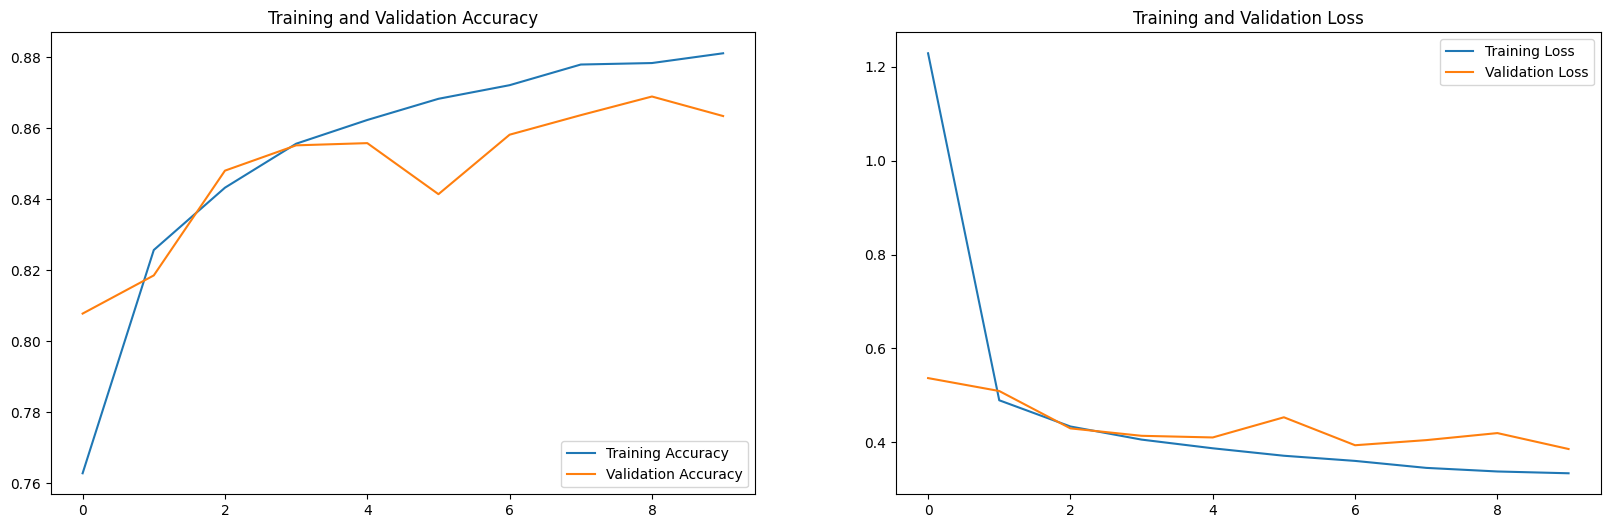

In [15]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(10)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)

print('\nLoss on the TEST Set: {:,.3f}'.format(loss))
print('Accuracy on the TEST Set: {:.3%}'.format(accuracy))


Loss on the TEST Set: 0.365
Accuracy on the TEST Set: 87.700%
